In [2]:
import pandas as pd
import datetime
import nepali_datetime
import matplotlib.pyplot as plt
import seaborn as sns
from nepali_datetime import date as nep_date

In [3]:
df_1=pd.read_csv("../csv_files/daily_energy_values.csv")
df_1['date'] = pd.to_datetime(df_1['date'])
df_1['bs_date'] = df_1['date'].apply(lambda x: nep_date.from_datetime_date(x.date()))

df_1['month'] = df_1['date'].apply(lambda d: f"{d.year}-{d.month:02d}")
df_1['nepali_month'] = df_1['bs_date'].apply(lambda x: x.strftime('%Y-%m'))
df_1['week'] = df_1['date'].dt.strftime('%Y-%U')
df_1=df_1.sort_values(by='date')

In [4]:
df_1.head(10)

,date,nea,nea_subsidiary,ipp,import,total_energy_available,energy_export,inps_demand,energy_interruption,generation_deficit,energy_requirement,net_exchange_with_india,bs_date,month,nepali_month,week
7,2022-09-05,10574,12864,19561,173,43172.000,8547,34625,10,0,34635,0,2079-05-20,2022-09,2079-05,2022-36
22,2022-09-06,10325,12791,19119,688,42923.519,8646,34278,200,0,34478,0,2079-05-21,2022-09,2079-05,2022-36
13,2022-09-07,11012,12479,18917,418,42826.000,8117,34709,480,0,35189,0,2079-05-22,2022-09,2079-05,2022-36
26,2022-09-08,10881,12729,18668,496,42774.000,7668,35106,0,0,35106,0,2079-05-23,2022-09,2079-05,2022-36
28,2022-09-09,9302,12732,18891,1047,41972.000,8285,33687,0,0,33687,0,2079-05-24,2022-09,2079-05,2022-36
6,2022-09-10,8996,12557,19032,817,41403.000,9598,31805,8,0,31813,0,2079-05-25,2022-09,2079-05,2022-36
2,2022-09-11,10073,12887,19842,788,43589.000,8736,34853,0,0,34853,0,2079-05-26,2022-09,2079-05,2022-37
12,2022-09-12,10341,12889,19251,421,42902.000,8477,34425,0,0,34425,0,2079-05-27,2022-09,2079-05,2022-37
27,2022-09-13,9851,12748,19441,342,42382.000,10075,32308,15,0,32323,0,2079-05-28,2022-09,2079-05,2022-37
14,2022-09-14,10007,12688,19236,152,42083.000,9037,33046,0,0,33046,0,2079-05-29,2022-09,2079-05,2022-37


In [5]:
monthly_export = df_1.groupby('nepali_month')['net_exchange_with_india'].mean()
monthly_export.head(10)

nepali_month
2079-05        0.000000
2079-06    -1485.000000
2079-07    -6724.500000
2079-08    -2383.344828
2079-09     6743.033333
2079-10    10723.724138
2079-11    10615.700000
2079-12    11222.965517
2080-01    12765.354839
2080-02     5006.187500
Name: net_exchange_with_india, dtype: float64

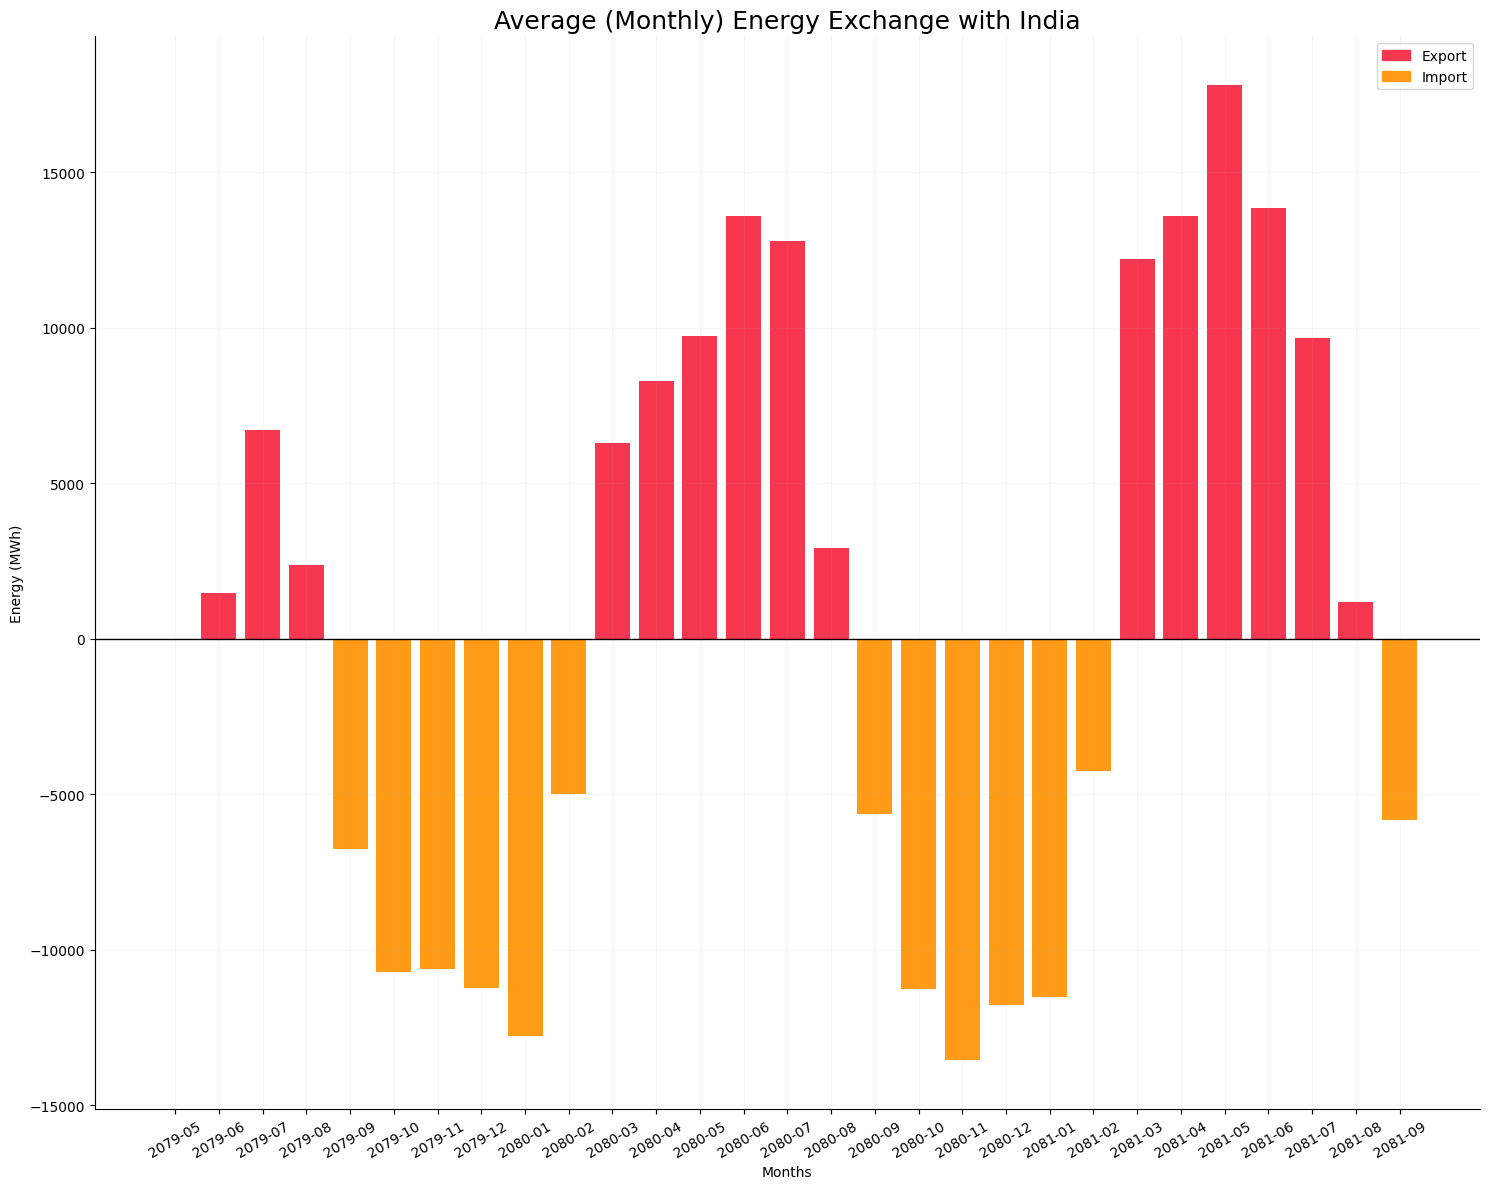

In [6]:
# Group by month and calculate mean energy export/import
monthly_export = df_1.groupby('nepali_month')['net_exchange_with_india'].mean()
monthly_export = monthly_export.sort_index()

# Generate color list - flip the logic since we're inverting values
colors = ['#FF9B17' if val > 0 else '#F7374F' for val in monthly_export.values]

fig, ax = plt.subplots(figsize=(15, 12))
# Plot with negated values
ax.bar(monthly_export.index, -monthly_export.values, color=colors)

plt.axhline(0, color='black', linewidth=1)
plt.title('Average (Monthly) Energy Exchange with India', fontsize=18, fontweight='light')
plt.xlabel('Months')
plt.ylabel('Energy (MWh)')
plt.xticks(rotation=30)

# Add legend
import matplotlib.patches as mpatches
green_patch = mpatches.Patch(color='#F7374F', label='Export')
red_patch = mpatches.Patch(color='#FF9B17', label='Import')
plt.legend(handles=[green_patch, red_patch])

# Styling
plt.grid(True, alpha=0.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

Energy Generation

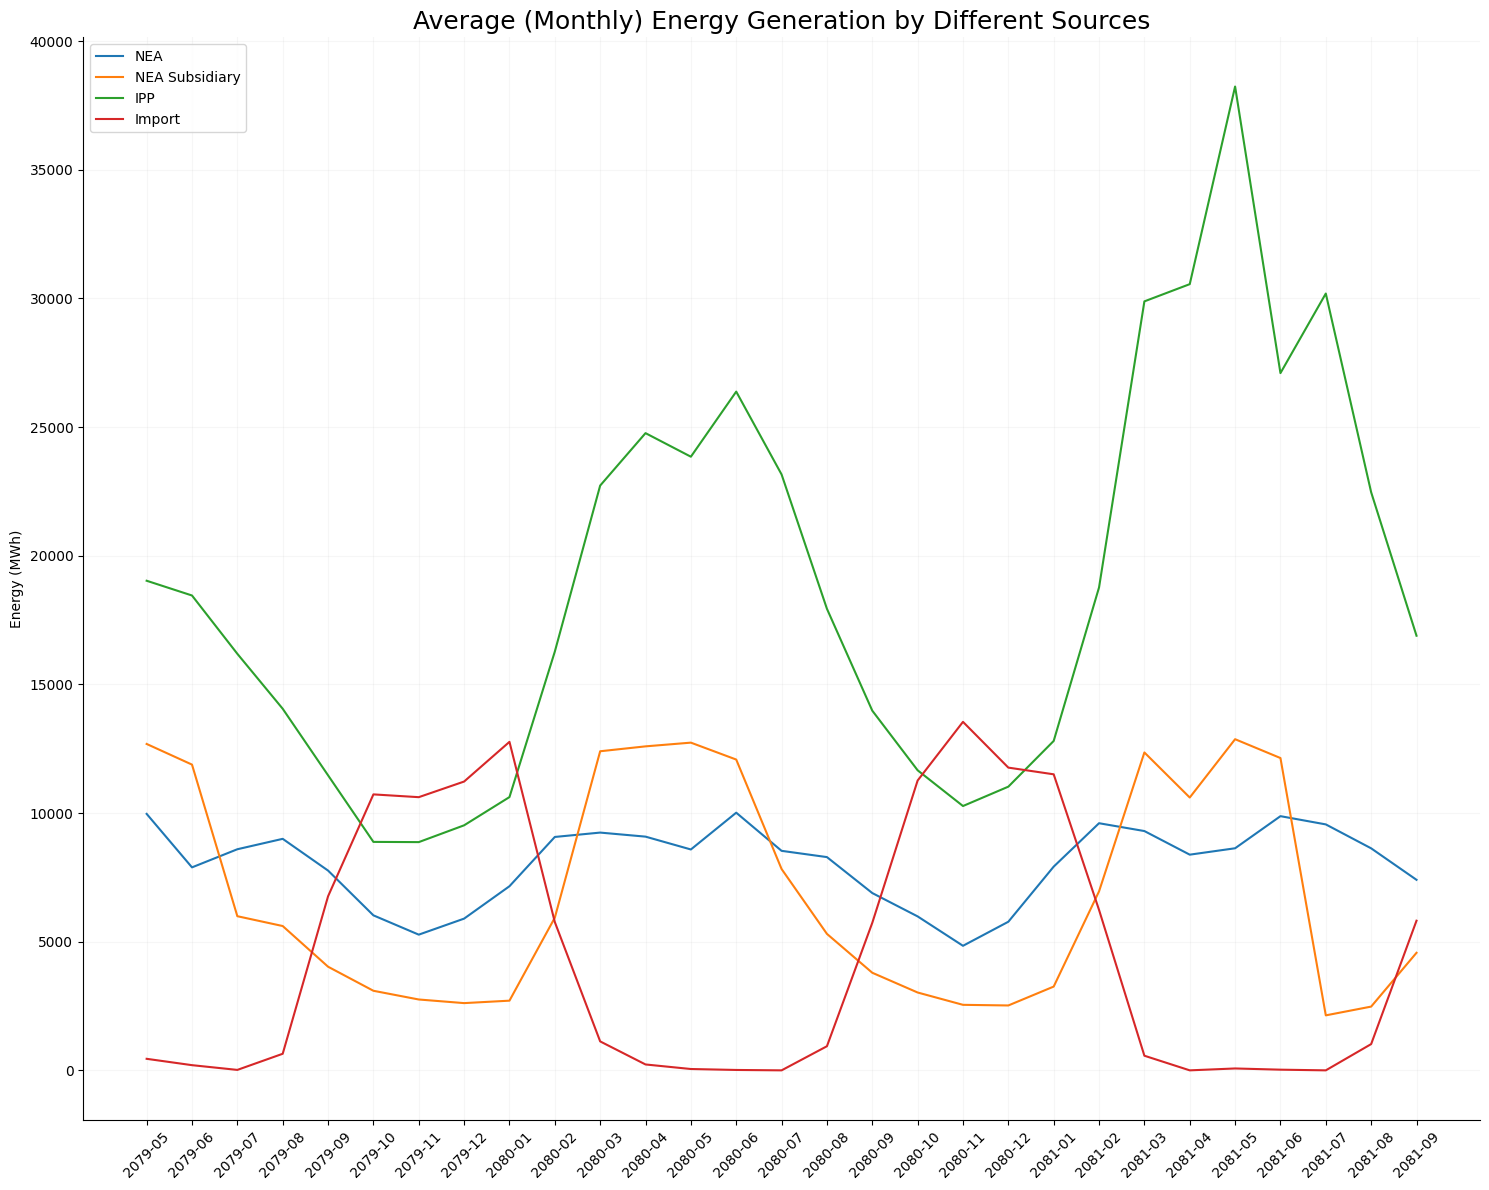

In [7]:
fig, ax = plt.subplots(figsize=(15, 12))
nea_gen = df_1.groupby('nepali_month')['nea'].mean()
nea_subs_gen=df_1.groupby('nepali_month')['nea_subsidiary'].mean()
ipp_gen=df_1.groupby('nepali_month')['ipp'].mean()
import_gen=df_1.groupby('nepali_month')['import'].mean()
plt.plot(nea_gen.index, nea_gen.values, label='NEA')
plt.plot(nea_subs_gen.index, nea_subs_gen.values, label='NEA Subsidiary')
plt.plot(ipp_gen.index, ipp_gen.values, label='IPP')
plt.plot(import_gen.index, import_gen.values, label='Import')
plt.title('Average (Monthly) Energy Generation by Different Sources', fontsize=18, fontweight='light')
plt.ylabel('Energy (MWh)')
plt.xticks(rotation=45)
plt.legend(loc='upper left')

# Styling
plt.grid(True, alpha=0.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()  

In [8]:
df_1.head(10)

,date,nea,nea_subsidiary,ipp,import,total_energy_available,energy_export,inps_demand,energy_interruption,generation_deficit,energy_requirement,net_exchange_with_india,bs_date,month,nepali_month,week
7,2022-09-05,10574,12864,19561,173,43172.000,8547,34625,10,0,34635,0,2079-05-20,2022-09,2079-05,2022-36
22,2022-09-06,10325,12791,19119,688,42923.519,8646,34278,200,0,34478,0,2079-05-21,2022-09,2079-05,2022-36
13,2022-09-07,11012,12479,18917,418,42826.000,8117,34709,480,0,35189,0,2079-05-22,2022-09,2079-05,2022-36
26,2022-09-08,10881,12729,18668,496,42774.000,7668,35106,0,0,35106,0,2079-05-23,2022-09,2079-05,2022-36
28,2022-09-09,9302,12732,18891,1047,41972.000,8285,33687,0,0,33687,0,2079-05-24,2022-09,2079-05,2022-36
6,2022-09-10,8996,12557,19032,817,41403.000,9598,31805,8,0,31813,0,2079-05-25,2022-09,2079-05,2022-36
2,2022-09-11,10073,12887,19842,788,43589.000,8736,34853,0,0,34853,0,2079-05-26,2022-09,2079-05,2022-37
12,2022-09-12,10341,12889,19251,421,42902.000,8477,34425,0,0,34425,0,2079-05-27,2022-09,2079-05,2022-37
27,2022-09-13,9851,12748,19441,342,42382.000,10075,32308,15,0,32323,0,2079-05-28,2022-09,2079-05,2022-37
14,2022-09-14,10007,12688,19236,152,42083.000,9037,33046,0,0,33046,0,2079-05-29,2022-09,2079-05,2022-37


## Peak time generation, Demand and Cross Border Exchange

In [9]:
df_2 = pd.read_csv('../csv_files/demand_cb_exchange@peak_time.csv')
df_2['date'] = pd.to_datetime(df_2['date'])
df_2['bs_date'] = df_2['date'].apply(lambda x: nep_date.from_datetime_date(x.date()))

df_2['month'] = df_2['date'].apply(lambda d: f"{d.year}-{d.month:02d}")
df_2['nepali_month'] = df_2['bs_date'].apply(lambda x: x.strftime('%B %Y'))
df_2['week'] = df_2['date'].dt.strftime('%Y-%U')
df_2['nepali_week'] = df_2['bs_date'].apply(lambda x: x.strftime('%Y-%U'))

df_2=df_2.sort_values(by='date')
df_2.head(10)

,date,pk_time,generation,import,recorded_pk_availablity,export,demd_met@pk_time,interruption,deficit,pk_demd_met,net_exchange_with_india,bs_date,month,nepali_month,week,nepali_week
7,2022-09-05,19:20,1900,47,1947,239,1708,0,0,1708,-192.0,2079-05-20,2022-09,Bhadau 2079,2022-36,2079-21
22,2022-09-06,19:15,1862,49,1912,272,1639,20,0,1659,-223.0,2079-05-21,2022-09,Bhadau 2079,2022-36,2079-21
13,2022-09-07,19:10,1859,47,1905,210,1695,20,0,1715,-163.3,2079-05-22,2022-09,Bhadau 2079,2022-36,2079-21
26,2022-09-08,19:10,1879,74,1953,271,1682,0,0,1682,-197.1,2079-05-23,2022-09,Bhadau 2079,2022-36,2079-21
28,2022-09-09,19:05,1833,51,1884,272,1612,0,0,1612,-220.7,2079-05-24,2022-09,Bhadau 2079,2022-36,2079-21
6,2022-09-10,19:00,1778,82,1860,245,1615,25,0,1640,-162.7,2079-05-25,2022-09,Bhadau 2079,2022-36,2079-21
2,2022-09-11,19:00,1838,66,1904,225,1679,0,0,1679,-159.0,2079-05-26,2022-09,Bhadau 2079,2022-37,2079-22
12,2022-09-12,19:00,1833,33,1866,281,1585,0,0,1585,-247.6,2079-05-27,2022-09,Bhadau 2079,2022-37,2079-22
27,2022-09-13,19:00,1829,47,1876,263,1613,0,0,1613,-215.8,2079-05-28,2022-09,Bhadau 2079,2022-37,2079-22
14,2022-09-14,19:00,1771,71,1842,253,1589,0,0,1589,-181.7,2079-05-29,2022-09,Bhadau 2079,2022-37,2079-22


In [10]:
avg_weekly_generation = (
    df_2.groupby('nepali_week')
        .agg({
            'generation': 'mean',
            'nepali_month': 'first'  # or 'mode' if weeks span multiple months
        })
        .rename(columns={'generation': 'avg_generation'})
)
avg_weekly_generation['month_short'] = avg_weekly_generation['nepali_month'].apply(
    lambda x: x if x.startswith('Baishakh') else x.split()[0]
)

avg_weekly_demand =(
    df_2.groupby('nepali_week')
        .agg({
            'pk_demd_met': 'mean',
            'nepali_month': 'first'  # or 'mode' if weeks span multiple months
        })
        .rename(columns={'pk_demd_met': 'avg_demand'})
)

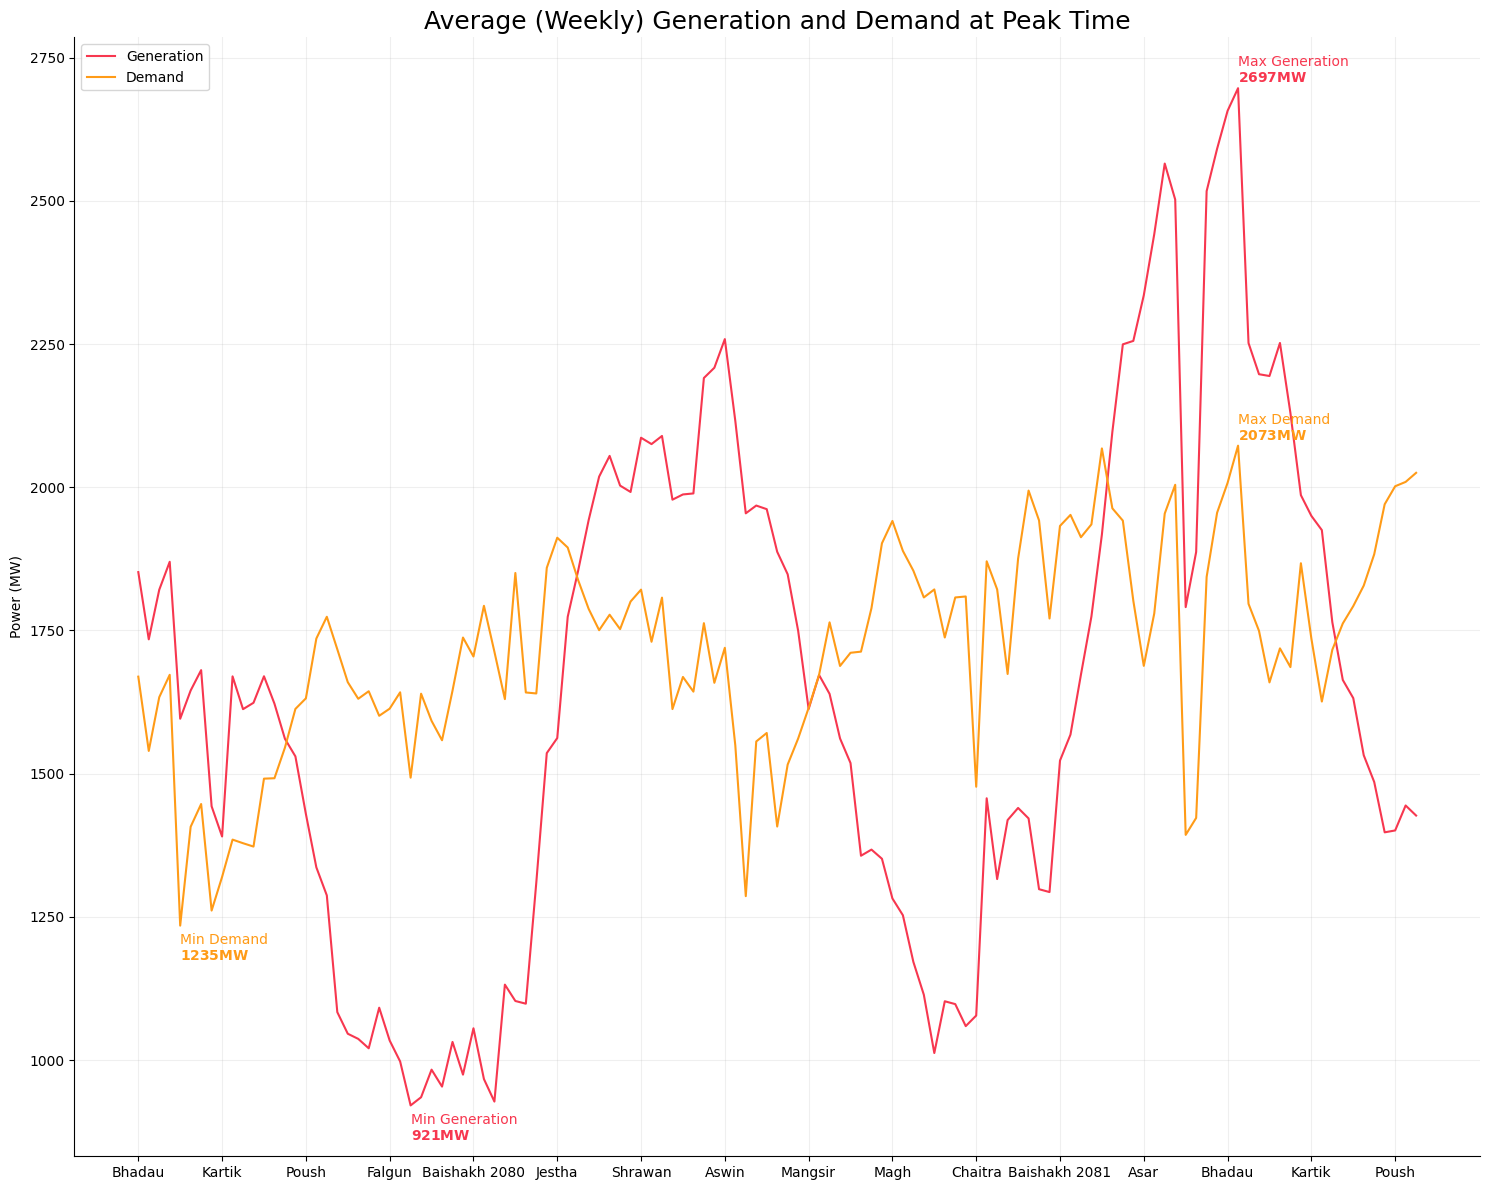

In [11]:
fig, ax = plt.subplots(figsize=(15, 12))

# Plotting the weekly average generation
ax.plot(avg_weekly_generation.index, avg_weekly_generation['avg_generation'], color='#F7374F')
ax.plot(avg_weekly_demand.index, avg_weekly_demand['avg_demand'], color='#FF9B17')

# Max values
max_week = avg_weekly_generation['avg_generation'].idxmax()
max_value = avg_weekly_generation['avg_generation'].max()

max_week_2 = avg_weekly_demand['avg_demand'].idxmax()
max_value_2 = avg_weekly_demand['avg_demand'].max()

# Min values
min_week = avg_weekly_generation['avg_generation'].idxmin()
min_value = avg_weekly_generation['avg_generation'].min()

min_week_2 = avg_weekly_demand['avg_demand'].idxmin()
min_value_2 = avg_weekly_demand['avg_demand'].min()

# Add max value labels
ax.text(max_week, max_value + 10, f'Max Generation\n' + r'$\bf{' + f'{max_value:.0f} MW' + '}$', fontsize=10, color='#F7374F')
ax.text(max_week_2, max_value_2 + 10, f'Max Demand\n' + r'$\bf{' + f'{max_value_2:.0f} MW' + '}$', fontsize=10, color='#FF9B17')

# Add min value labels
ax.text(min_week, min_value - 60, f'Min Generation\n' + r'$\bf{' + f'{min_value:.0f} MW' + '}$', fontsize=10, color='#F7374F')
ax.text(min_week_2, min_value_2 - 60, f'Min Demand\n' + r'$\bf{' + f'{min_value_2:.0f} MW' + '}$', fontsize=10, color='#FF9B17')

# Title and labels
plt.title('Average (Weekly) Generation and Demand at Peak Time', fontsize=18, fontweight='light')
plt.ylabel('Power (MW)')

# Use the 'month' values as xtick labels every 10th week
step = 8
xtick_locs = avg_weekly_generation.index[::step]
xtick_labels = avg_weekly_generation['month_short'][::step]

plt.xticks(ticks=xtick_locs, labels=xtick_labels)
plt.legend(loc='upper left',labels=['Generation', 'Demand'])

# Styling
plt.grid(True, alpha=0.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()
